20210946_김다은_회귀분석 통계형 모델 실습

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split

In [35]:
from sympy import symbols, exp, Function, Max, Piecewise, Matrix
from sympy.plotting import plot, plot3d, PlotGrid
from sympy.functions.elementary.hyperbolic import tanh
from sympy.printing.latex import LatexPrinter, print_latex

## Datasets : slump

### 설명변수(독립변수)
- SLUMP_cm
- FLOW_cm
- Compressive_Strength_Mpa
- Cemment
- Slag
- Fly_ash
- Water
- SP
- Coarse_Aggr
- Fine_Aggr


In [22]:
# data download
data_url = "https://www.openml.org/data/download/21230447/file173039d31e62.arff"
data = pd.read_csv(data_url, sep=",", skiprows=43, header=None)
data.columns = ['SLUMP_cm','FLOW_cm','Compressive_Strength_Mpa','Cemment','Slag','Fly_ash','Water','SP','Coarse_Aggr','Fine_Aggr']
data

,SLUMP_cm,FLOW_cm,Compressive_Strength_Mpa,Cemment,Slag,Fly_ash,Water,SP,Coarse_Aggr,Fine_Aggr
0,349.0,0.0,178.0,230.0,6.0,785.0,721.0,20.00,68.5,43.95
1,366.0,0.0,187.0,191.0,7.0,824.0,757.0,24.75,62.7,52.65
2,274.0,89.0,115.0,202.0,9.0,759.0,827.0,26.50,68.0,35.52
3,137.0,167.0,214.0,226.0,6.0,708.0,757.0,27.50,70.0,34.45
4,275.0,99.0,127.0,184.0,13.0,810.0,790.0,25.75,64.5,43.54
...,...,...,...,...,...,...,...,...,...,...
67,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.00,20.0,49.97
68,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.00,20.0,50.23
69,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.00,20.0,50.50
70,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.50,67.0,49.17


In [64]:
X = data[['SLUMP_cm', 'FLOW_cm']]
y = data['Fine_Aggr']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [66]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = model.predict(X_test)

In [68]:
r_squared = model.score(X_test, y_test)
print("테스트셋의 결정계수:", r_squared)

테스트셋의 결정계수: 0.3260714033541673


In [73]:
w1, w2 = model.coef_
b = model.intercept_
print("회귀식: y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(w1, w2, b))

회귀식: y = 0.04*x1 + -0.04*x2 + 30.60


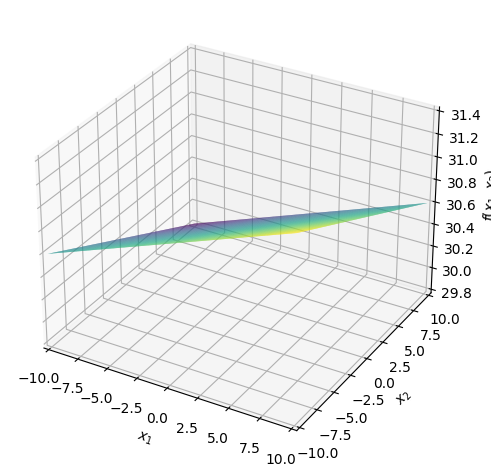

In [72]:
x1, x2, y = symbols('x1 x2 y')

w1, w2, b = 0.04, -0.04, 30.60
regression_eq = w1 * x1 + w2 * x2 + b

p = plot3d(regression_eq, (x1, -10, 10), (x2, -10, 10), show=False)

p.show()